Project ini akan menganalisis 911 Call data dari [Kaggle](https://www.kaggle.com/mchirico/montcoalert).
Dalam data terdapat:

* lat  : String variabel, Latitude
* lng  : String variabel, Longtitude
* desc : String variabel, Deskripsi Telepon Darurat
* zip  : String variabel, Kode Pos (zipcode)
* title: String variabel, Title
* timeStamp: String variabel, YYYY-MM-DD HH:MM:SS
* twp: String variabel, Township
* addr: String variabel, Alamat
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
data = 'F:\Documents\File Ino\Portfolio Ino\Data\911.csv'
df = pd.read_csv(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Melihat info data

In [4]:
df.head()
#Melihat head data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

Top 5 panggilan untuk 911, Berdasarkan kode pos (Zipcode)

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

Top 5 panggilan untuk 911, Berdasarkan township

In [7]:
df['title'].nunique()

148

Terdapat 144 unique title

In [8]:
df['alasan'] = df['title'].apply(lambda title:title.split(':')[0])

In [9]:
df['alasan'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: alasan, dtype: int64

Alasan menghubungi 911 terbanyak terdapat pada EMS yaitu 332.692, kedua 'Traffic' sebesar 230.208, selanjutnya 'Fire' sebesar 100.622

<AxesSubplot:xlabel='alasan', ylabel='count'>

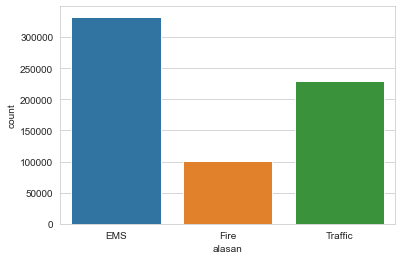

In [10]:
sns.countplot(x=df['alasan'], data = df)
#Visualisasi data menggunakan countplot untuk menghitung seluruh alasan dan membandingkannya

In [11]:
type(df['timeStamp'].iloc[0])
#Mengecek tipe data 'timeStamp'

str

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
#Mengubah tipe data menjadi datetime

In [13]:
type(df['timeStamp'].iloc[0])
#Mengecek tipe data 'timeStamp' kembali

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df['Jam'] = df['timeStamp'].apply(lambda time:time.hour)
df['Bulan'] = df['timeStamp'].apply(lambda time:time.month)
df['Hari'] = df['timeStamp'].apply(lambda time:time.dayofweek)

#Membuat daftar kolom baru berdasarkan Jam, Bulan, dan Hari.

In [15]:
dmap = {0:'Sen', 1:'Sel', 2:'Rab', 3:'Kam', 4:'Jum', 5:'Sab', 6:'Min'}
#membuat dictionary dan mengubah nomor pada kolom hari menjadi nama-nama hari

In [16]:
df['Hari'] = df['Hari'].map(dmap)

In [17]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,alasan,Jam,Bulan,Hari
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Kam
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Kam
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Kam
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Kam
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Kam


<AxesSubplot:xlabel='Hari', ylabel='count'>

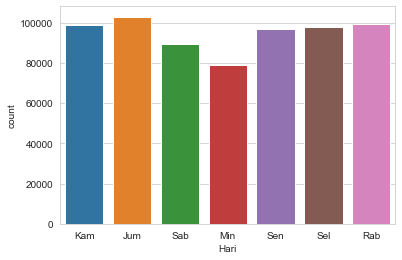

In [18]:
sns.countplot(x = df['Hari'], data = df)

Berdasarkan kolom Hari, dapat dilihat pemanggilan 911 terbanyak dilakukan pada hari jumat sekitar 100.000 panggilan lebih. Pemanggilan terhadap 911 sangat berkurang pada weekend (Sabtu dan Minggu). Kemudian naik lagi, pada hari senin dan berangsur naik sampai hari rabu.

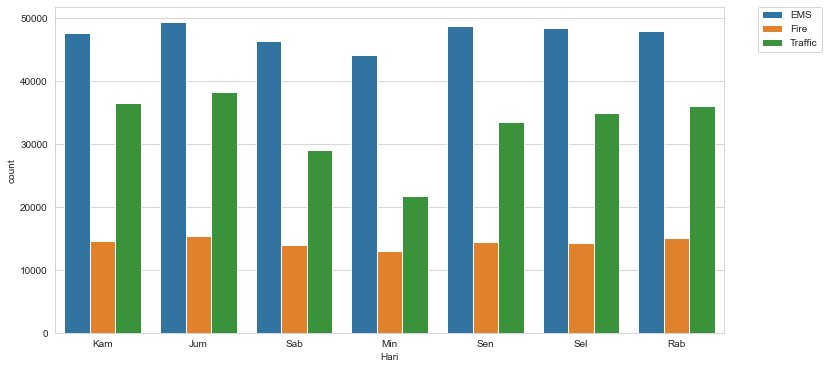

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['Hari'], data = df, hue = df['alasan'])

# Memindahkan Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Panggilan 911, terbanyak pada kategori panggilan EMS, sedangkan panggilan 911 yang paling rendah adalah pada kategori Fire. Kondisi ini mengikuti pada countplot berdasarkan hari.

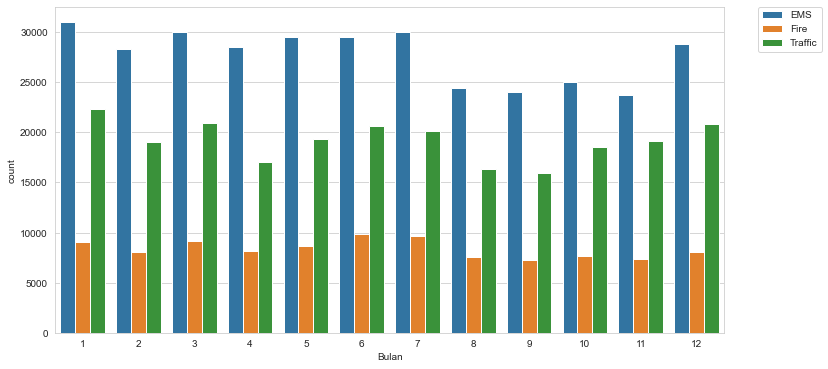

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['Bulan'], data = df, hue = df['alasan'])
# Memindahkan Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
BdBulan = df.groupby('Bulan').count()
BdBulan.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,alasan,Jam,Hari
Bulan,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='Bulan'>

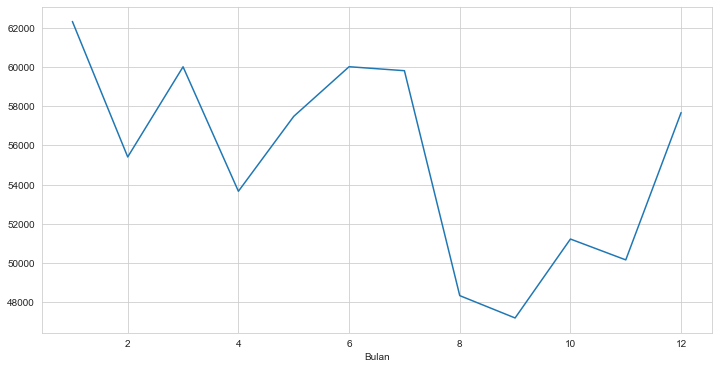

In [43]:
plt.figure(figsize=(12,6))
BdBulan['twp'].plot()

<Figure size 864x432 with 0 Axes>

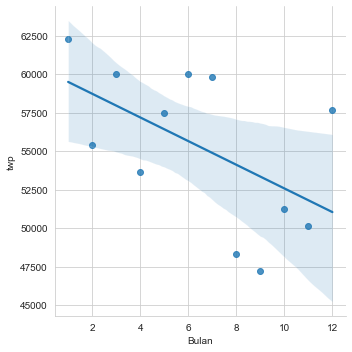

In [45]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Bulan',y='twp',data=BdBulan.reset_index())

In [24]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

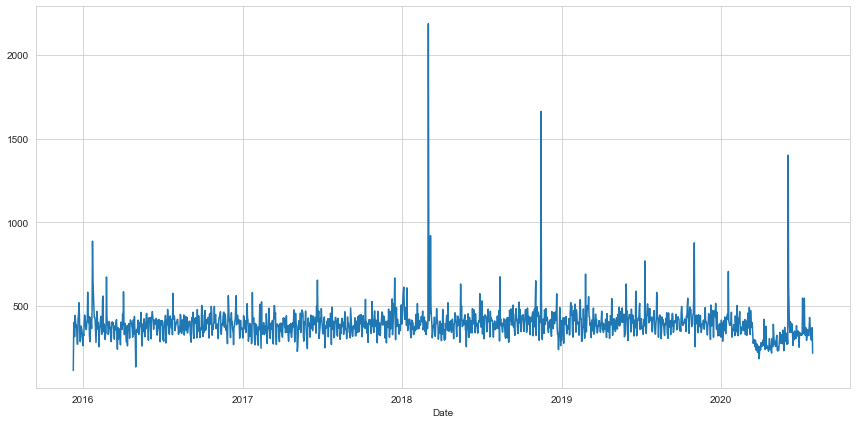

In [39]:
plt.figure(figsize=(12,6))
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Dapat dilihat pada plot di atas, terdapat lonjakan pada awal Tahun 2018 sekitar bulan Februari/Maret terdapat 200 lebih panggilan 911 dan terjadi lonjakan kedua yang tinggi pada akhir tahun 2018. Selanjutnya pada Tahun 2020 sekitar bulan Februari/Maret mulai menurun, tetapi berangsur naik kembali dan memuncak pada bulan Juni tahun 2020.

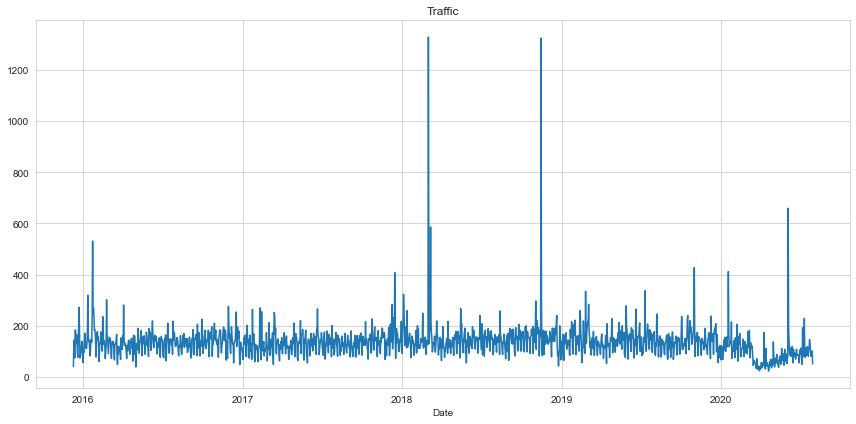

In [40]:
plt.figure(figsize=(12,6))
df[df['alasan']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

Pada plot ini adalah plot alasan memanggil 911, pada kategori 'Traffic. Terdapat beberapa kali lonjakan yang tercipta, yaitu terjadi pada awal dan akhir 2018 terjadi 1200 panggilan lebih.

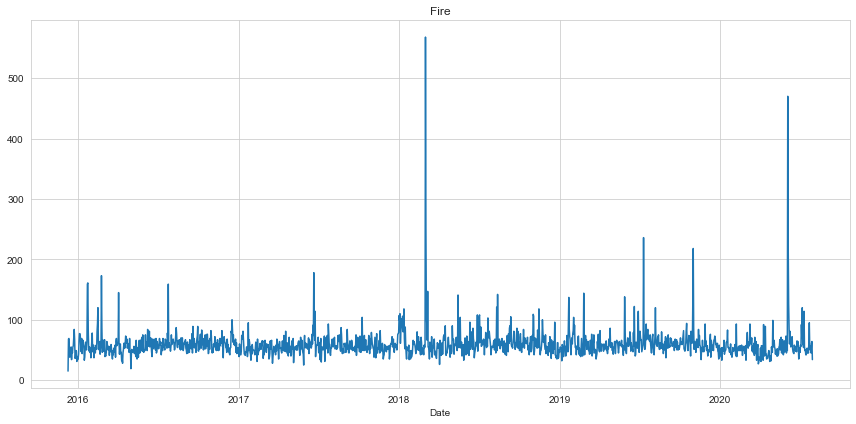

In [41]:
plt.figure(figsize=(12,6))
df[df['alasan']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

Pada plot ini adalah plot alasan memanggil 911, pada kategori 'Fire'. Terdapat lonjakan tertinggi pada pada tahun 2018 sekitar bulan Maret yaitu 500 lebih panggilan. Hal tersebut juga tercipta lagi pada tahun 2020 bulan Juli, tetapi sedikit menurun yaitu sekitar 480 panggilan.

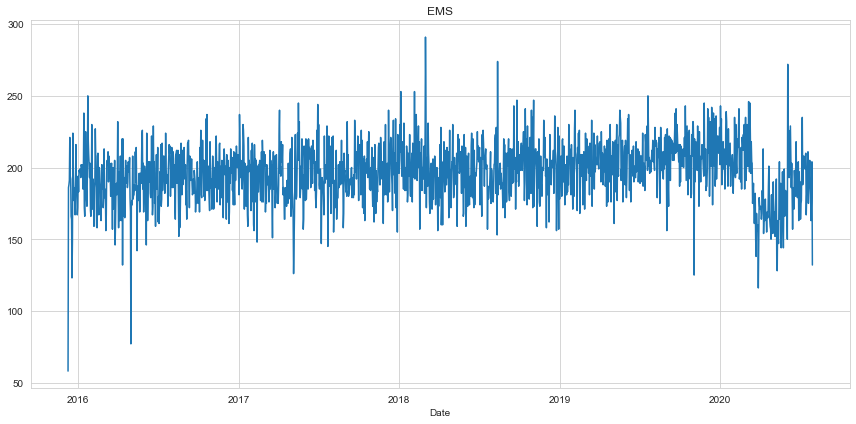

In [42]:
plt.figure(figsize=(12,6))
df[df['alasan']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Untuk alasan pemanggilan 911 pada kategori 'EMS' sangat konsisten di angka 200, dan terdapat beberapa lonjakan sampai hampir 300 panggilan. Pada tahun 2020 terdapat penurunan yang signfikan terjadi sekitar di bulan Maret.

In [29]:
Hari_jam = df.groupby(by=['Hari','Jam']).count()['alasan'].unstack()
Hari_jam.head(7)

Jam,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Hari,,,,,,,,,,,,,,,,,,,,,
Jum,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Kam,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Min,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Rab,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207
Sab,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sel,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Sen,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072


<AxesSubplot:xlabel='Jam', ylabel='Hari'>

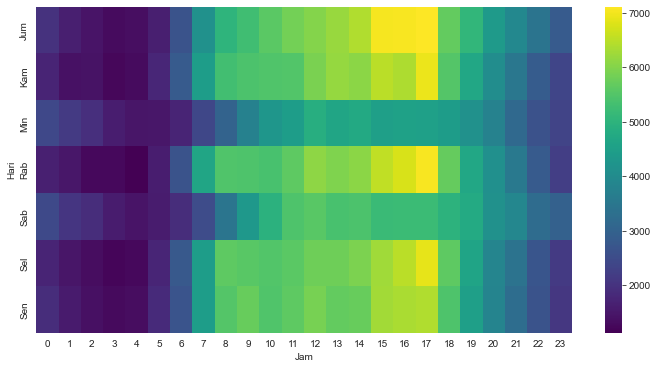

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(Hari_jam,cmap='viridis')

Untuk pemanggilan 911, sering terjadi saat siang hari pada jam 15, 14, 17. Tetapi pada saat weekend pada jam tersebut, tidak sebanyak pada hari biasa.

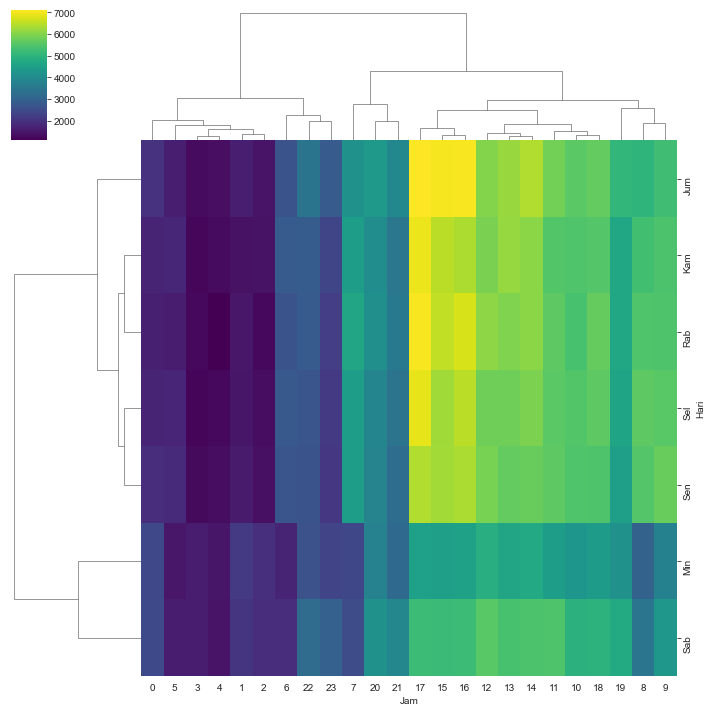

In [31]:
sns.clustermap(Hari_jam,cmap='viridis')

In [32]:
Bulan_hari = df.groupby(by=['Hari','Bulan']).count()['alasan'].unstack()
Bulan_hari.head()

Bulan,1,2,3,4,5,6,7,8,9,10,11,12
Hari,,,,,,,,,,,,
Jum,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Kam,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Min,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Rab,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682
Sab,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592


<AxesSubplot:xlabel='Bulan', ylabel='Hari'>

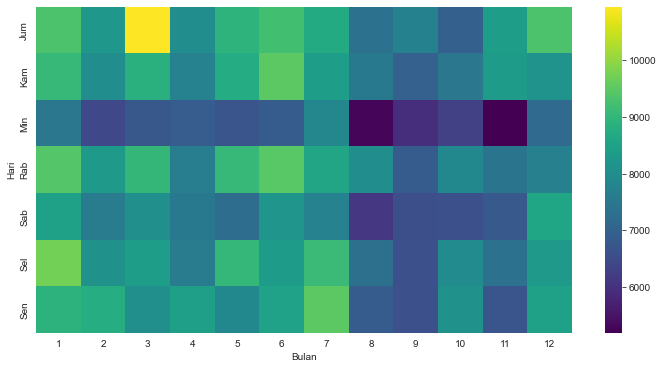

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(Bulan_hari,cmap='viridis')

Pada heatmap di atas, terjadi panggilan tertinggi pada hari jumat,bulan maret.

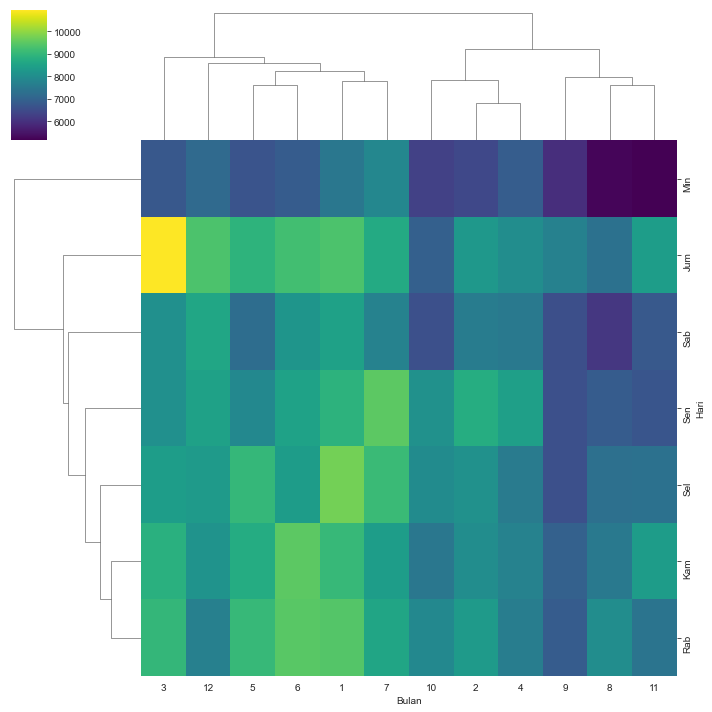

In [34]:
sns.clustermap(Bulan_hari,cmap='viridis')